### correct abstract

Pick examples with wrong answers and pass in the correct abstract

                   Metric  Accuracy  Total Count
          Answer Accuracy  0.855539         3385
     Discrepancy Accuracy  0.497489         3385
Evidence Quality Accuracy  0.811226         3385


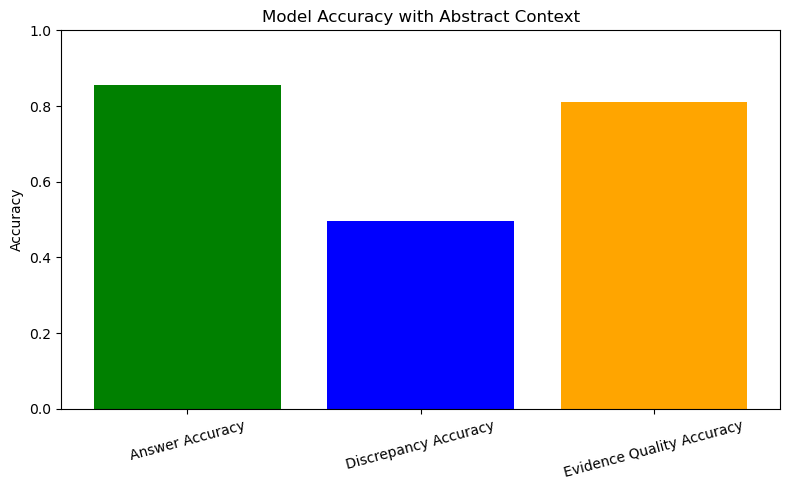

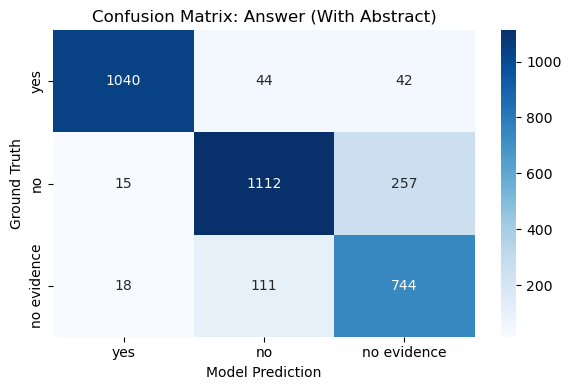

In [13]:
import json
import pandas as pd

# Load RAG result JSON
with open("/Users/pql/Desktop/proj/rag_eval_results_with_abstract.json", "r") as f:
    with_abstract = json.load(f)

# Convert to DataFrame
df_with_abstract = pd.DataFrame.from_dict(with_abstract, orient="index")


import matplotlib.pyplot as plt
import pandas as pd

# Normalize string fields
df_with_abstract["model_answer"] = df_with_abstract["model_answer"].str.lower().str.strip()
df_with_abstract["ground_truth_answer"] = df_with_abstract["ground_truth_answer"].str.lower().str.strip()
df_with_abstract["model_discrepancy"] = df_with_abstract["model_discrepancy"].str.lower().str.strip()
df_with_abstract["ground_truth_discrepancy"] = df_with_abstract["ground_truth_discrepancy"].str.lower().str.strip()
df_with_abstract["model_evidence-quality"] = df_with_abstract["model_evidence-quality"].str.lower().str.strip()
df_with_abstract["ground_truth_evidence-quality"] = df_with_abstract["ground_truth_evidence-quality"].str.lower().str.strip()

# Compute correctness flags
df_with_abstract["answer_correct"] = df_with_abstract["model_answer"] == df_with_abstract["ground_truth_answer"]
df_with_abstract["discrepancy_correct"] = df_with_abstract["model_discrepancy"] == df_with_abstract["ground_truth_discrepancy"]
df_with_abstract["evidence_quality_correct"] = df_with_abstract["model_evidence-quality"] == df_with_abstract["ground_truth_evidence-quality"]

# Summary DataFrame
summary_df = pd.DataFrame({
    "Metric": ["Answer Accuracy", "Discrepancy Accuracy", "Evidence Quality Accuracy"],
    "Accuracy": [
        df_with_abstract["answer_correct"].mean(),
        df_with_abstract["discrepancy_correct"].mean(),
        df_with_abstract["evidence_quality_correct"].mean()
    ],
    "Total Count": len(df_with_abstract)
})

# Display summary
print(summary_df.to_string(index=False))

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(summary_df["Metric"], summary_df["Accuracy"], color=["green", "blue", "orange"])
plt.ylim(0, 1)
plt.title("Model Accuracy with Abstract Context")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()






import seaborn as sns
from sklearn.metrics import confusion_matrix

# Normalize answer fields
df_with_abstract["model_answer"] = df_with_abstract["model_answer"].str.lower().str.strip()
df_with_abstract["ground_truth_answer"] = df_with_abstract["ground_truth_answer"].str.lower().str.strip()

# Define labels for consistency
labels = ["yes", "no", "no evidence"]

# Generate confusion matrix
cm = confusion_matrix(
    df_with_abstract["ground_truth_answer"],
    df_with_abstract["model_answer"],
    labels=labels
)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix: Answer (With Abstract)")
plt.xlabel("Model Prediction")
plt.ylabel("Ground Truth")
plt.tight_layout()
plt.show()


### random abstract

Pick examples of wrong answers and pass in a random abstract

                   Metric  Accuracy  Total Count
          Answer Accuracy  0.089513         3385
     Discrepancy Accuracy  0.389069         3385
Evidence Quality Accuracy  0.183161         3385


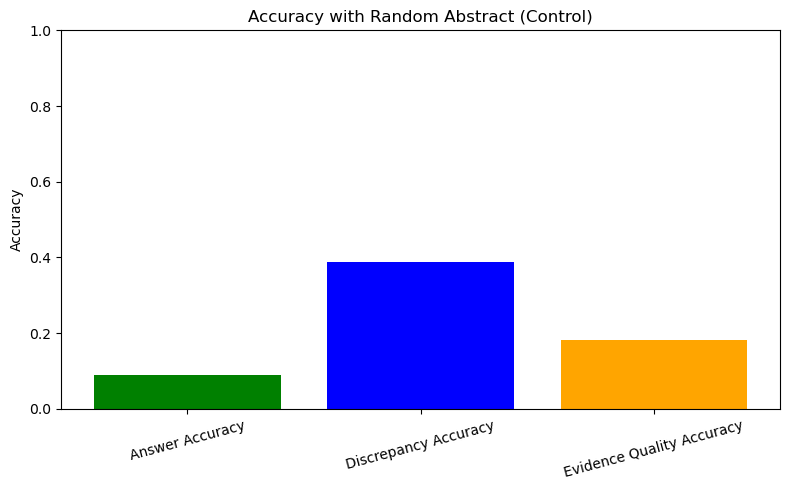

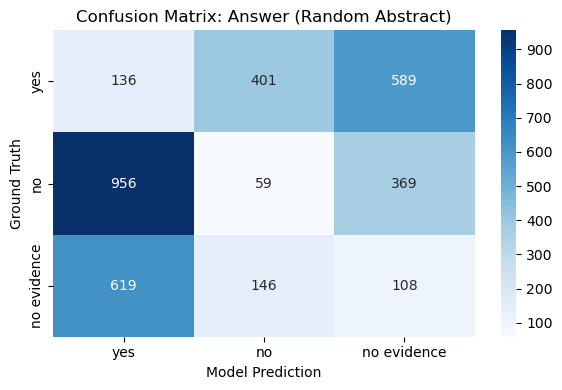

In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the random abstract result file
with open("/Users/pql/Desktop/proj/rag_eval_results_with_random_abstract.json", "r") as f:
    with_random_abstract = json.load(f)

# Convert to DataFrame
df_random = pd.DataFrame.from_dict(with_random_abstract, orient="index")

# Normalize fields
df_random["model_answer"] = df_random["model_answer"].str.lower().str.strip()
df_random["ground_truth_answer"] = df_random["ground_truth_answer"].str.lower().str.strip()
df_random["model_discrepancy"] = df_random["model_discrepancy"].str.lower().str.strip()
df_random["ground_truth_discrepancy"] = df_random["ground_truth_discrepancy"].str.lower().str.strip()
df_random["model_evidence-quality"] = df_random["model_evidence-quality"].str.lower().str.strip()
df_random["ground_truth_evidence-quality"] = df_random["ground_truth_evidence-quality"].str.lower().str.strip()

# Compute accuracy flags
df_random["answer_correct"] = df_random["model_answer"] == df_random["ground_truth_answer"]
df_random["discrepancy_correct"] = df_random["model_discrepancy"] == df_random["ground_truth_discrepancy"]
df_random["evidence_quality_correct"] = df_random["model_evidence-quality"] == df_random["ground_truth_evidence-quality"]

# Summary DataFrame
summary_df = pd.DataFrame({
    "Metric": ["Answer Accuracy", "Discrepancy Accuracy", "Evidence Quality Accuracy"],
    "Accuracy": [
        df_random["answer_correct"].mean(),
        df_random["discrepancy_correct"].mean(),
        df_random["evidence_quality_correct"].mean()
    ],
    "Total Count": len(df_random)
})

# Print summary
print(summary_df.to_string(index=False))

# Plot
plt.figure(figsize=(8, 5))
plt.bar(summary_df["Metric"], summary_df["Accuracy"], color=["green", "blue", "orange"])
plt.ylim(0, 1)
plt.title("Accuracy with Random Abstract (Control)")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define label order
labels = ["yes", "no", "no evidence"]

# Generate confusion matrix
cm = confusion_matrix(
    df_random["ground_truth_answer"],
    df_random["model_answer"],
    labels=labels
)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix: Answer (Random Abstract)")
plt.xlabel("Model Prediction")
plt.ylabel("Ground Truth")
plt.tight_layout()
plt.show()


### pubmed search results

Pick questions with wrong answers, search the question in pubmed and get the abstracts of top 3 articles (sorted by relevance). Pass in the abstracts and re-evaluate the model.

Filtered out 1085 questions with no PubMed results.

                   Metric  Accuracy  Total Count
          Answer Accuracy  0.620435         2300
     Discrepancy Accuracy  0.488696         2300
Evidence Quality Accuracy  0.546522         2300


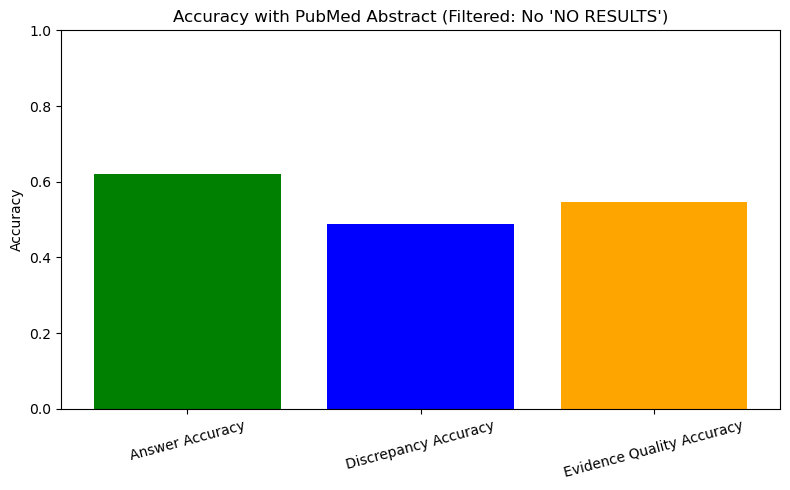

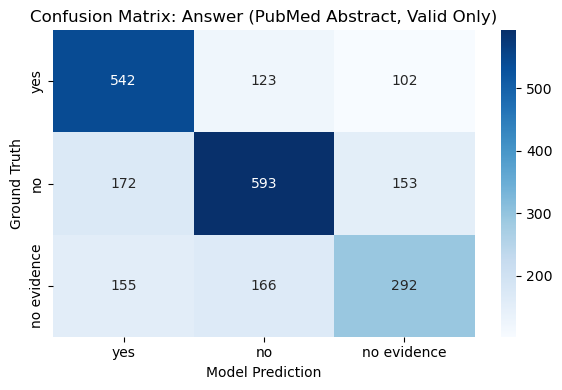

In [42]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load model predictions
with open("/Users/pql/Desktop/proj/rag_eval_results_with_pubmed_search.json", "r") as f:
    with_pubmed_abstract = json.load(f)

# Load pubmed context source to identify empty contexts
with open("/Users/pql/Desktop/proj/pubmed_context_dataset.json", "r") as f:
    pubmed_context_raw = json.load(f)

# Filter: keep only entries with actual pubmed context
valid_qids = {
    qid for qid, entry in pubmed_context_raw.items()
    if entry["pubmed_context"].strip().upper() != "NO PUBMED RESULTS FOUND"
}
filtered_pubmed_data = {
    qid: item for qid, item in with_pubmed_abstract.items() if qid in valid_qids
}

# Convert to DataFrame
df_pubmed = pd.DataFrame.from_dict(filtered_pubmed_data, orient="index")

# Normalize fields
df_pubmed["model_answer"] = df_pubmed["model_answer"].str.lower().str.strip()
df_pubmed["ground_truth_answer"] = df_pubmed["ground_truth_answer"].str.lower().str.strip()
df_pubmed["model_discrepancy"] = df_pubmed["model_discrepancy"].str.lower().str.strip()
df_pubmed["ground_truth_discrepancy"] = df_pubmed["ground_truth_discrepancy"].str.lower().str.strip()
df_pubmed["model_evidence-quality"] = df_pubmed["model_evidence-quality"].str.lower().str.strip()
df_pubmed["ground_truth_evidence-quality"] = df_pubmed["ground_truth_evidence-quality"].str.lower().str.strip()

# Compute accuracy flags
df_pubmed["answer_correct"] = df_pubmed["model_answer"] == df_pubmed["ground_truth_answer"]
df_pubmed["discrepancy_correct"] = df_pubmed["model_discrepancy"] == df_pubmed["ground_truth_discrepancy"]
df_pubmed["evidence_quality_correct"] = df_pubmed["model_evidence-quality"] == df_pubmed["ground_truth_evidence-quality"]

# Summary DataFrame
summary_df_pubmed = pd.DataFrame({
    "Metric": ["Answer Accuracy", "Discrepancy Accuracy", "Evidence Quality Accuracy"],
    "Accuracy": [
        df_pubmed["answer_correct"].mean(),
        df_pubmed["discrepancy_correct"].mean(),
        df_pubmed["evidence_quality_correct"].mean()
    ],
    "Total Count": len(df_pubmed)
})

print(f"Filtered out {len(with_pubmed_abstract) - len(df_pubmed)} questions with no PubMed results.\n")

# Print summary
print(summary_df_pubmed.to_string(index=False))

# Accuracy bar plot
plt.figure(figsize=(8, 5))
plt.bar(summary_df_pubmed["Metric"], summary_df_pubmed["Accuracy"], color=["green", "blue", "orange"])
plt.ylim(0, 1)
plt.title("Accuracy with PubMed Abstract (Filtered: No 'NO RESULTS')")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Confusion matrix (answer only)
labels = ["yes", "no", "no evidence"]
cm_pubmed = confusion_matrix(
    df_pubmed["ground_truth_answer"],
    df_pubmed["model_answer"],
    labels=labels
)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_pubmed, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix: Answer (PubMed Abstract, Valid Only)")
plt.xlabel("Model Prediction")
plt.ylabel("Ground Truth")
plt.tight_layout()
plt.show()


### Comparison

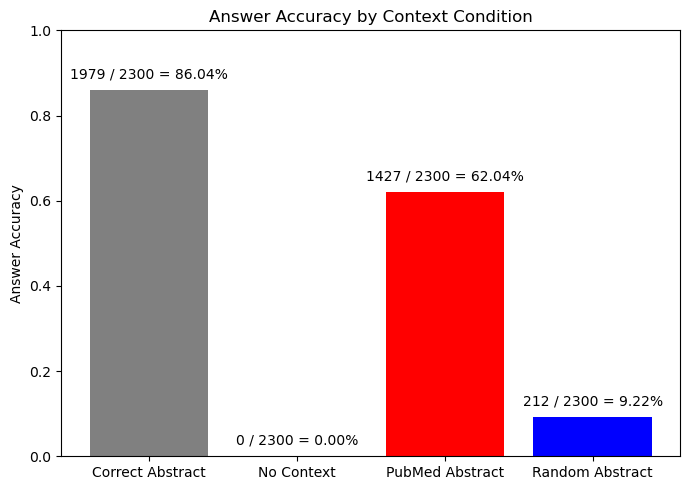

In [40]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load all four result sets
with open("test_4o_mini_on_4o_questions_with_predictions.json", "r") as f:
    no_context = json.load(f)

with open("rag_eval_results_with_abstract.json", "r") as f:
    with_abstract = json.load(f)

with open("rag_eval_results_with_random_abstract.json", "r") as f:
    with_random = json.load(f)

with open("rag_eval_results_with_pubmed_search.json", "r") as f:
    with_pubmed = json.load(f)

with open("pubmed_context_dataset.json", "r") as f:
    pubmed_contexts = json.load(f)

# Helper to build DataFrame
def build_df(source, label):
    records = []
    for qid, item in source.items():
        doi = item.get("doi", "").strip().lower()
        records.append({
            "qid": qid,
            "doi": doi,
            "model_answer": item.get("model_answer", "").strip().lower(),
            "ground_truth_answer": item.get("ground_truth_answer", "").strip().lower(),
            "condition": label
        })
    return pd.DataFrame(records)

# Build individual DataFrames
df_no = build_df(no_context, "No Context")
df_abs = build_df(with_abstract, "With Abstract")
df_rand = build_df(with_random, "Random Abstract")
df_pubmed = build_df(with_pubmed, "PubMed Abstract")

# Filter: keep only PubMed entries that actually have results
valid_pubmed_qids = {
    qid for qid, entry in pubmed_contexts.items()
    if entry["pubmed_context"].strip().upper() != "NO PUBMED RESULTS FOUND"
}
df_pubmed = df_pubmed[df_pubmed["qid"].isin(valid_pubmed_qids)]

# Match only common DOIs across all 4 settings
common_dois = set(df_no["doi"]) & set(df_abs["doi"]) & set(df_rand["doi"]) & set(df_pubmed["doi"])
df_no = df_no[df_no["doi"].isin(common_dois)]
df_abs = df_abs[df_abs["doi"].isin(common_dois)]
df_rand = df_rand[df_rand["doi"].isin(common_dois)]
df_pubmed = df_pubmed[df_pubmed["doi"].isin(common_dois)]

# Combine and evaluate correctness
df_all = pd.concat([df_no, df_abs, df_rand, df_pubmed], ignore_index=True)
df_all["correct"] = df_all["model_answer"] == df_all["ground_truth_answer"]

# Aggregate with counts and formatted labels
summary = df_all.groupby("condition").agg(
    accuracy=("correct", "mean"),
    correct=("correct", "sum"),
    total=("correct", "count")
).reset_index()

summary["label"] = summary.apply(
    lambda row: f"{int(row.correct)} / {int(row.total)} = {row.accuracy:.2%}", axis=1
)


# Plot
plt.figure(figsize=(7, 5))
bars = plt.bar(summary["condition"], summary["accuracy"], color=["gray", "green", "red", "blue"])
plt.ylim(0, 1)
plt.ylabel("Answer Accuracy")
plt.title("Answer Accuracy by Context Condition")

# Add annotated labels
for bar, label in zip(bars, summary["label"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, label,
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


a validation of how similarity between Qs and searching results affect prediction accuracy

In [50]:
import json
import pandas as pd

MAX_SAMPLES = 500
MAX_ABSTRACT_CHARS = 2000

with open("rag_eval_results_with_pubmed_search.json", "r") as f:
    eval_data = json.load(f)

with open("pubmed_context_dataset.json", "r") as f:
    context_data = json.load(f)

records = []
for qid, item in eval_data.items():
    if len(records) >= MAX_SAMPLES:
        break
    abstract = context_data.get(qid, {}).get("pubmed_context", "")
    if abstract.strip().upper() == "NO PUBMED RESULTS FOUND":
        continue
    records.append({
        "qid": qid,
        "question": item["question"],
        "abstract": abstract[:MAX_ABSTRACT_CHARS],
        "model_answer": item["model_answer"].strip().lower(),
        "ground_truth_answer": item["ground_truth_answer"].strip().lower()
    })

df_pubmed = pd.DataFrame(records)
df_pubmed["correct"] = df_pubmed["model_answer"] == df_pubmed["ground_truth_answer"]
df_pubmed.to_csv("pubmed_eval_for_embedding.csv", index=False)


In [ ]:
import openai
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

openai.api_key = "OPENAI_API_KEY_REDACTED"  # Replace with your API key

df_pubmed = pd.read_csv("pubmed_eval_for_embedding.csv")

def get_embedding(text, model="text-embedding-3-large"):
    return openai.embeddings.create(input=[text], model=model).data[0].embedding

question_embeddings = []
abstract_embeddings = []

for _, row in tqdm(df_pubmed.iterrows(), total=len(df_pubmed), desc="Embedding"):
    question_embeddings.append(get_embedding(row["question"]))
    abstract_embeddings.append(get_embedding(row["abstract"]))

df_pubmed["question_embedding"] = question_embeddings
df_pubmed["abstract_embedding"] = abstract_embeddings

df_pubmed["similarity"] = [
    cosine_similarity([q], [a])[0][0]
    for q, a in zip(question_embeddings, abstract_embeddings)
]

df_pubmed.to_csv("pubmed_eval_1000_with_similarity.csv", index=False)


Optimization terminated successfully.
         Current function value: 0.599586
         Iterations 5


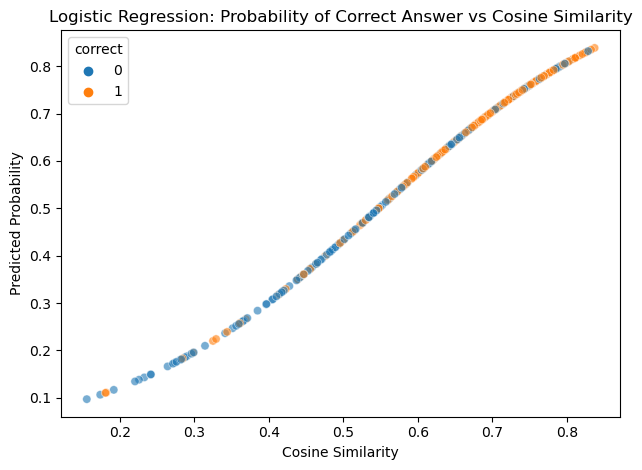

                           Logit Regression Results                           
Dep. Variable:                correct   No. Observations:                  500
Model:                          Logit   Df Residuals:                      498
Method:                           MLE   Df Model:                            1
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.09971
Time:                        00:39:38   Log-Likelihood:                -299.79
converged:                       True   LL-Null:                       -332.99
Covariance Type:            nonrobust   LLR p-value:                 3.676e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1132      0.494     -6.299      0.000      -4.082      -2.145
similarity     5.6855      0.767      7.417      0.000       4.183       7.188


In [54]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load similarity and correctness data
df_pubmed = pd.read_csv("pubmed_eval_1000_with_similarity.csv")

# Filter valid rows
df_pubmed = df_pubmed.dropna(subset=["similarity", "correct"])
df_pubmed["correct"] = df_pubmed["correct"].astype(int)

# Define independent and dependent variables
X = sm.add_constant(df_pubmed["similarity"])
y = df_pubmed["correct"]

# Fit logistic regression model
logit_model = sm.Logit(y, X).fit()

# Add predicted probabilities to DataFrame
df_pubmed["pred_prob"] = logit_model.predict(X)

# Plot predicted probability vs. similarity
sns.scatterplot(data=df_pubmed, x="similarity", y="pred_prob", hue="correct", alpha=0.6)
plt.title("Logistic Regression: Probability of Correct Answer vs Cosine Similarity")
plt.xlabel("Cosine Similarity")
plt.ylabel("Predicted Probability")
plt.tight_layout()
plt.show()

# Print regression summary
print(logit_model.summary())
